# Symbolic maths: Sympy

*Davide Gerosa (Milano-Bicocca)*

**Sources**: Michael Zingale at Stony Brook University: https://sbu-python-class.github.io

SymPy provides support for symbolic math to python, similar to what you would do with Mathematica or Maple.  The major difference is that it acts just like any other python module, so you can use the symbolic math together in your own python projects with the rest of python functionality. Like python is open source, while Mathematica is proprietary (that said, Mathematica remains more powerful IMO).

The following import and function (`init_session()`) sets up a nice environment for us when working in Jupyter

In [1]:
from sympy import *
#init_session(use_latex="mathjax")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Exercises

In [ ]:
import sympy as sym
from sympy import init_session
init_session()

## Q1: Play with expressions

Create the expression:

$$f = x e^{-x} + x (1-x)$$

Then evaluate it for 

$$x = 0, 0.1, 0.2, 0.4, 0.8$$

In [42]:
x = symbols("x")
f = x * exp(-x) + x*(1-x)
f

               -x
x⋅(1 - x) + x⋅ℯ  

In [47]:
for i in [0, 0.1, 0.2, 0.4, 0.8]:
    print(f"Val {i}: {f.subs(x, i)}")

Val 0: 0
Val 0.1: 0.180483741803596
Val 0.2: 0.323746150615596
Val 0.4: 0.508128018414256
Val 0.8: 0.519463171293777


## Q2: Polynomials

Factor this polynomial

$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

Then find its zeros.

In [48]:
x = symbols("x")
f = x**4 - 6*x**3 + x**2 + 24*x + 16
f

 4      3    2            
x  - 6⋅x  + x  + 24⋅x + 16

In [52]:
factor(f)

       2        2
(x - 4) ⋅(x + 1) 

In [53]:
roots(f)

{-1: 2, 4: 2}

## Q3: There and back again 
Integrate the function:

$$f = \sin(x) e^{-x}$$

Then differentiate the result to see if you get back the original function

In [54]:
x = symbols("x")
f = sin(x) * exp(-x)
f

 -x       
ℯ  ⋅sin(x)

In [56]:
i = integrate(f)
i

   -x           -x       
  ℯ  ⋅sin(x)   ℯ  ⋅cos(x)
- ────────── - ──────────
      2            2     

In [57]:
diff(i, x)

 -x       
ℯ  ⋅sin(x)

## Q4: Parsing an expression

Write a program that reads in a mathematical expression as a string (e.g., `"sin(2*pi*x)"`), converts it to a sympy expression, and then evaluates it as needed.  

Have your program either make a plot of the entered function, or use the input function as the function to fit a dataset to using curvefit.

The following will be helpful:

`parse_expr()` will convert a string into a SymPy expression

In [4]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [5]:
s = "sin(2*pi*x)"
a = parse_expr(s)
a

sin(2*pi*x)

`sympy.lambdify()` will convert a sympy expression into a function that is callable by python.  You can make it a numpy-compatible function too (this means, e.g., that any `sin()` in your SymPy expression will be evaluate using `np.sin()`)

In [6]:
def evaluate(string, values):
    f = parse_expr(string)
    return lambdify(*f.free_symbols, f, "numpy")(values)

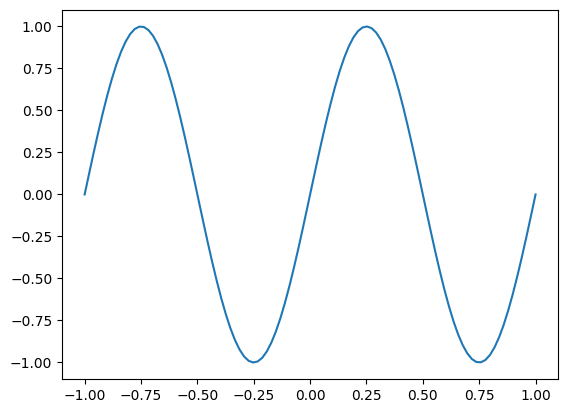

In [9]:
import matplotlib.pyplot as plt
import sympy
import numpy as np

f = "sin(2*pi*x)"

x = np.linspace(-1, 1, 100)
y = evaluate(f, x)

fig = plt.figure()
plt.plot(x, y)
plt.show()

## Q5: Let's go back to high school

Newton's 2nd law is

$$F = ma$$

Create a mass of 1 kg and an acceleration of 10 m/s$^2$, and compute the force, $F$, and express the result in Newtons.

Note: the `convert_to` function was added in SymPy 1.1, so if you are using an earlier version, you will need to divide by the target unit to do the conversion.

In [12]:
from sympy import *
from sympy.physics.units import *

m, a = symbols("m a")
F = m * a
F

a*m

In [26]:
mass = 1*kilogram
acc = 10 * meter / (second**2)

In [27]:
eval = F.subs({m: mass, a: acc})
eval

10*kilogram*meter/second**2

In [28]:
convert_to(eval, newton)

10*newton